![](images/EscUpmPolit_p.gif "UPM")

# Course Notes for Learning Intelligent Systems

Department of Telematic Engineering Systems, Universidad Politécnica de Madrid, © Carlos A. Iglesias

## [Introduction to  Visualization](00_Intro_Visualization.ipynb)

# Distribution charts
Charts for visualizing the distribution of a dataset.

## Plotting Univariate variables
**display** Draw a histogram and fit a kernel density estimate (KDE).

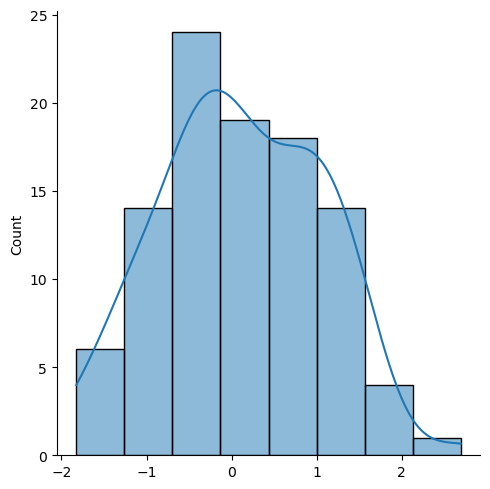

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

x = np.random.normal(size=100)
sns.displot(x, kde=True);

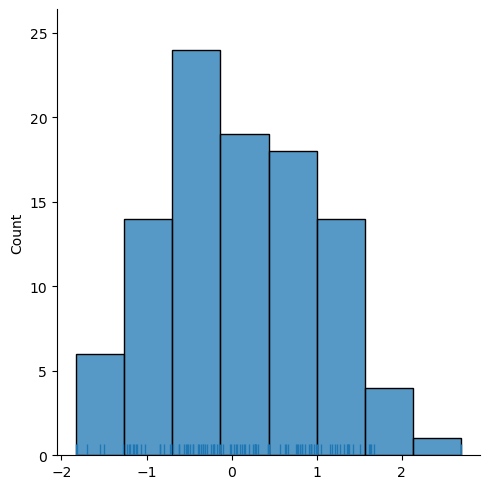

In [2]:
# Only the histogram and a rug plot (the observations)
sns.displot(x, kde=False, rug=True);

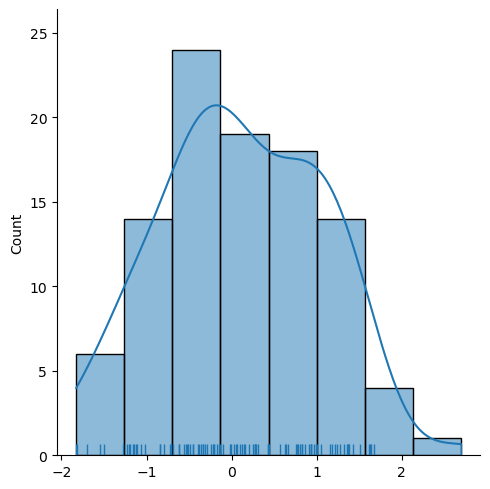

In [3]:
# Only the KDE and the rug plot
sns.displot(x, kde=True, rug=True);

<Axes: ylabel='Density'>

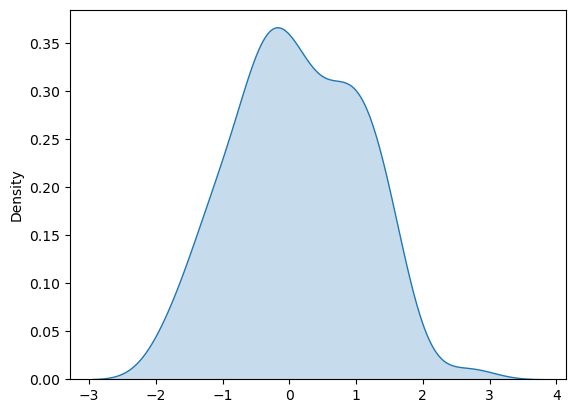

In [7]:
# We can use a shortcut: kdeplot if we want only kdeplot
sns.kdeplot(x, fill=True) #check fill=False
#sns.rugplot(x)

## Plotting Bivariate distributions
The most common chart is the **scatterplot**, where each observation is shown with a point at the x and y values.

This is analogous to a rug plot in two dimensions. You can draw a **scatterplot** with **lmplot())** and **jointplot()**.

It helps us to discover **correlations** (positive if the values of both variables increase or decrease together; or negative if one increases when the other decreases).

In [8]:
df = sns.load_dataset('tips')
df.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


**lmplot** shows us a scatterplot of variables x and y, fit a regression model (y ~ x), and plots the resulting regression line and a 95% confidence interval for that regression. 

An alternative is **regplot** (only for one relationship and enables detailed configuration of the axes).

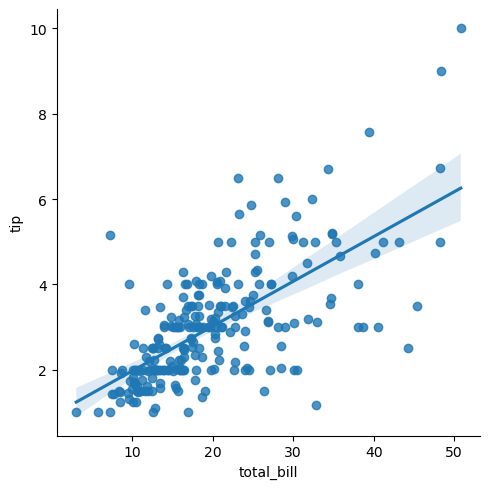

In [9]:
# 2 variables
sns.lmplot(x="total_bill", y="tip", data=df)

We can observe a positive correlation and a few outliers.


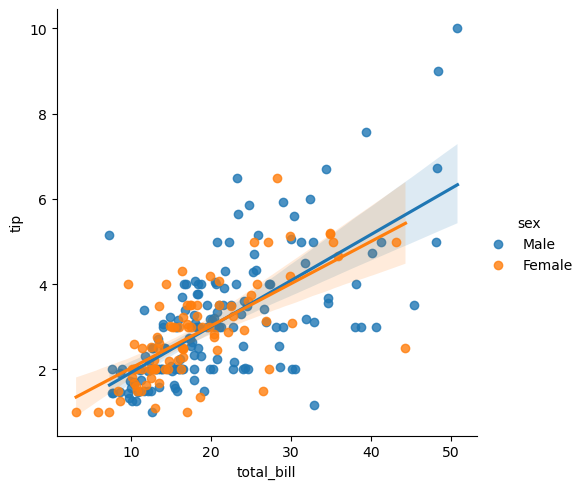

In [10]:
#Even 3 variables
sns.lmplot(x="total_bill", y="tip", hue="sex", data=df)

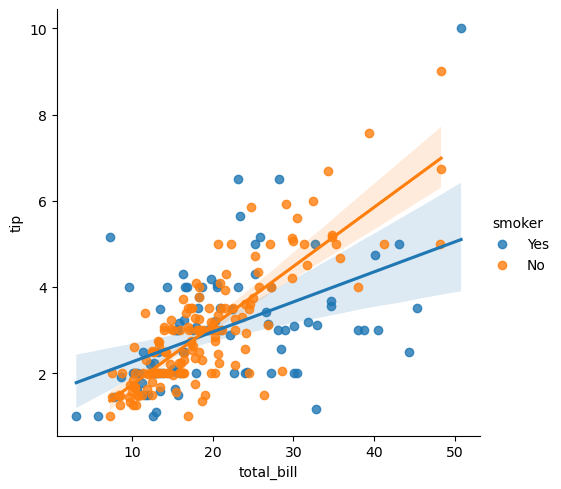

In [11]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=df)

A more straightforward function for relating variables with scatter plots is **relplot**.

**relplot** can also be used for continuous variables.

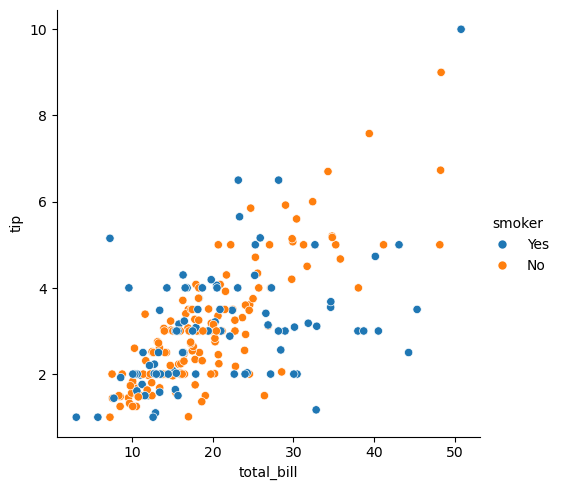

In [12]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=df)

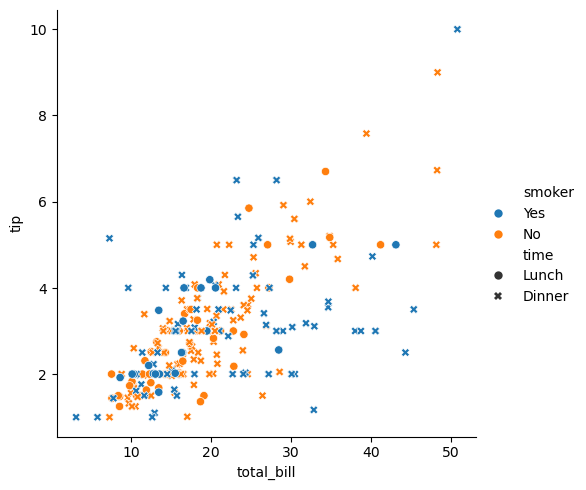

In [13]:
# We can even show four variables
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=df)

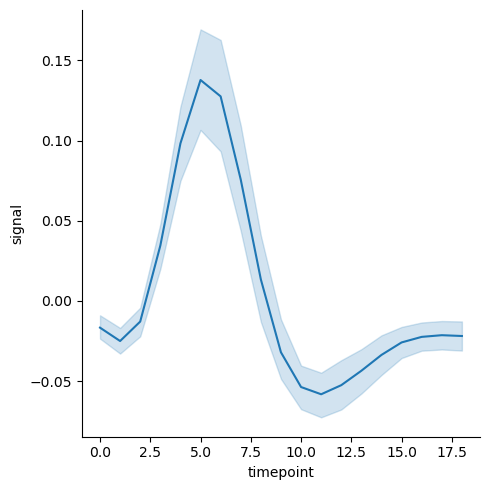

In [14]:
# Continuous variables
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

**joinplot** draws a scatterplot showing each observation with a point at the x and y values. It is like a rug plot for two variables.


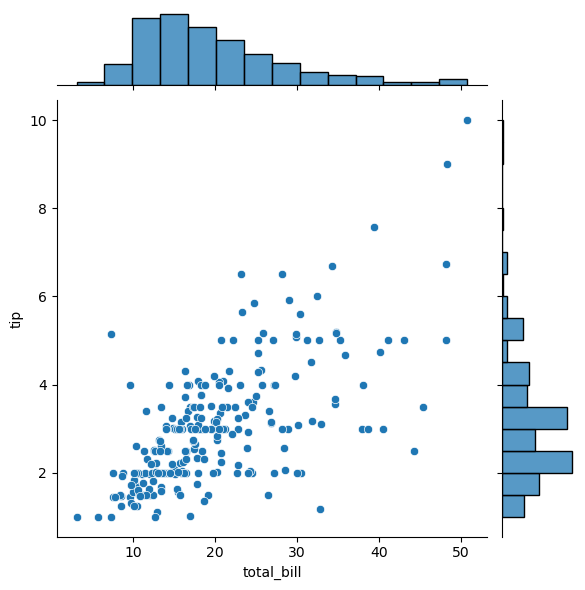

In [15]:
sns.jointplot(x="total_bill", y="tip", data=df)

The default value for kind is "scatter". If we modify this parameter, we have different charts.


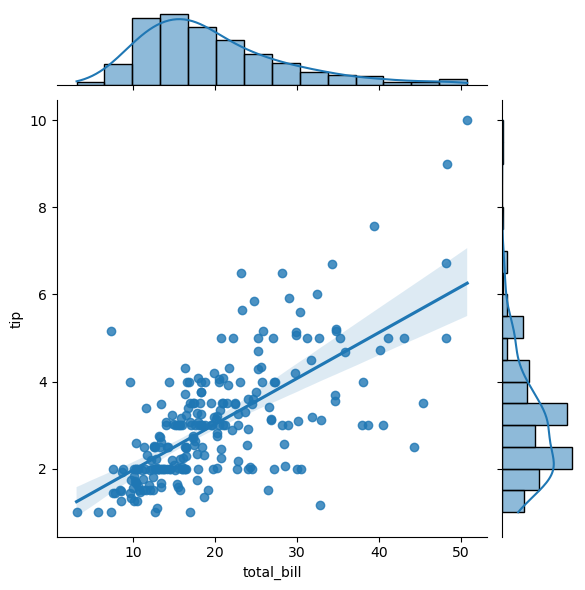

In [16]:
# Add  regression and kernel density fits
sns.jointplot(x="total_bill", y="tip", data=df, kind="reg")

We can group individual samples into hexagons with kind="hex" for large datasets. 

This chart is called **hexagonal bin plot** or simply **hexbin plot**.

It uses a lighter or darker color to represent the density of data.

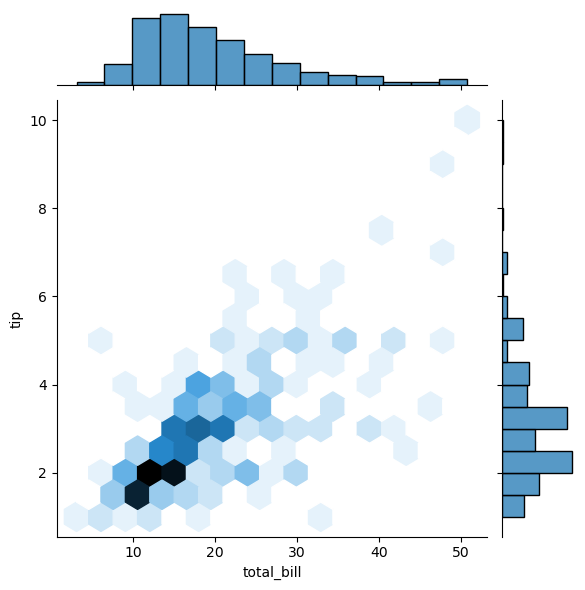

In [17]:
sns.jointplot(x="total_bill", y="tip", data=df, kind="hex")

We can also show a **contour plot**. KDE plot replaces the scatterplots and histograms with density estimates.

Contour plots or 2d density plots show the density of points, much as a topographic map shows elevation. 

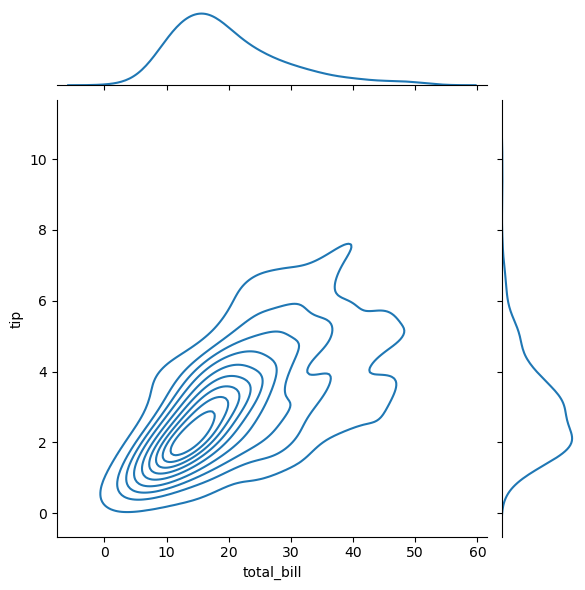

In [18]:
sns.jointplot(x="total_bill", y="tip", data=df, kind="kde")

## Pairwise relationships of the dataset
We can plot multiple pairwise bivariate distributions in a dataset with **pairplot**.

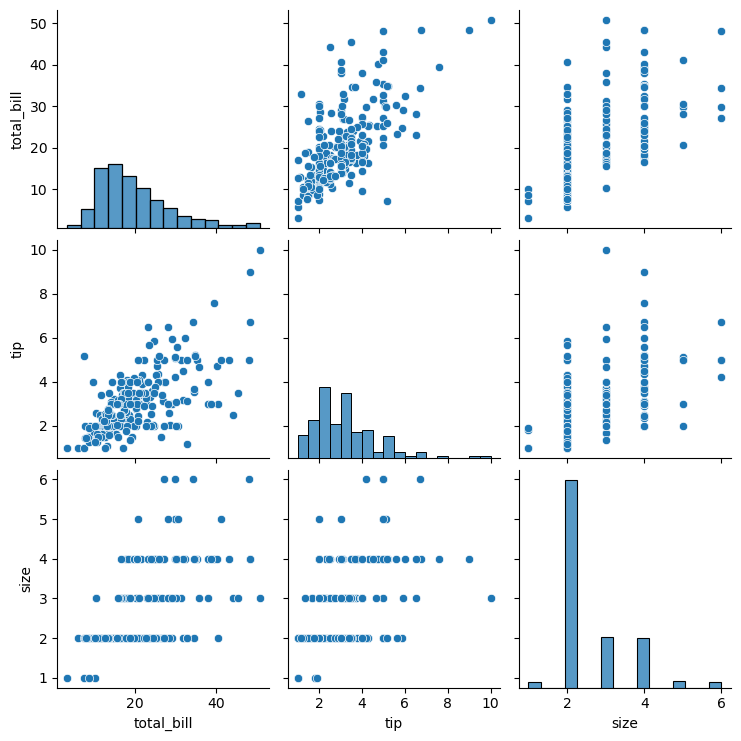

In [19]:
sns.pairplot(df);

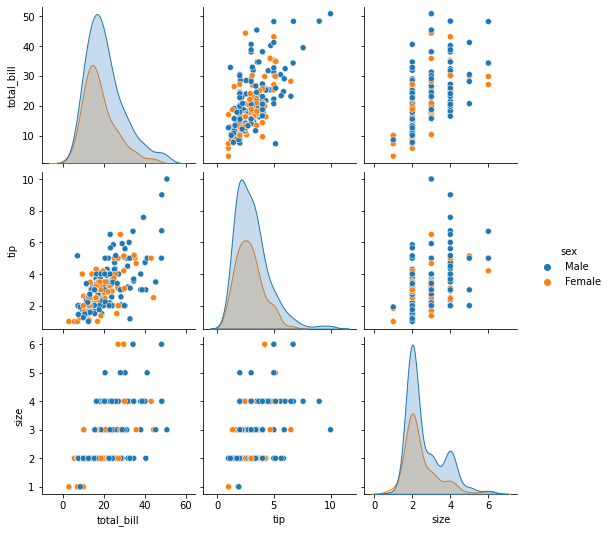

In [52]:
sns.pairplot(df, hue='sex');

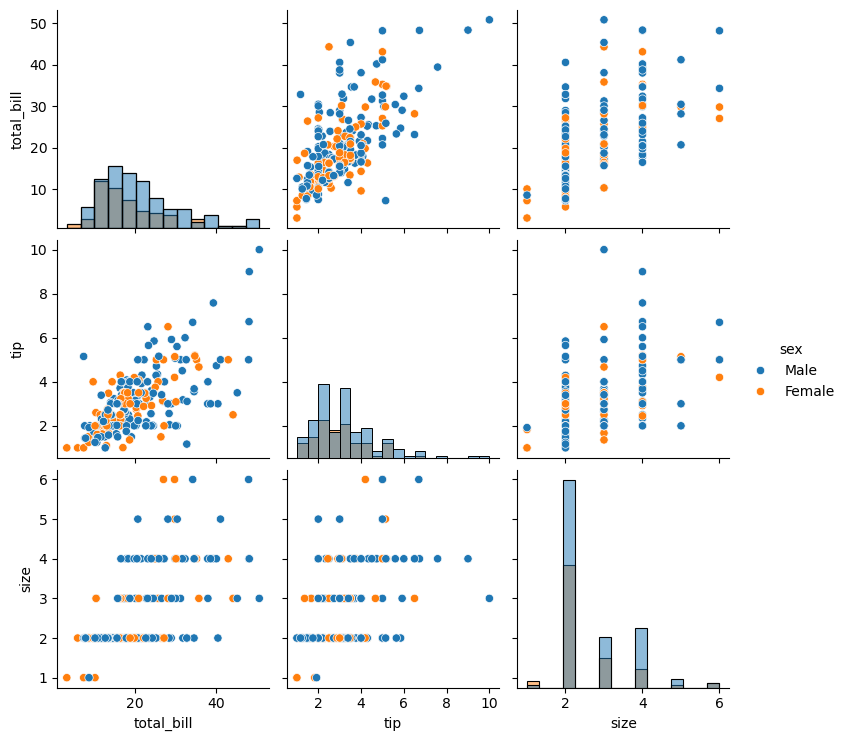

In [20]:
sns.pairplot(df, hue='sex', diag_kind="hist") ## Previously it has used diag_kind='kde'

## Categorical distributions
We can represent categorical scatter plots with **catplot**. The main challenge is that all the values of the categorical variables correspond with a point.

There are two implementations:
* **strip** (the default), which adjusts the positions of points on the categorical axis with a small amount of random “jitter”:
* **swarm**, which prevents points from overlapping.


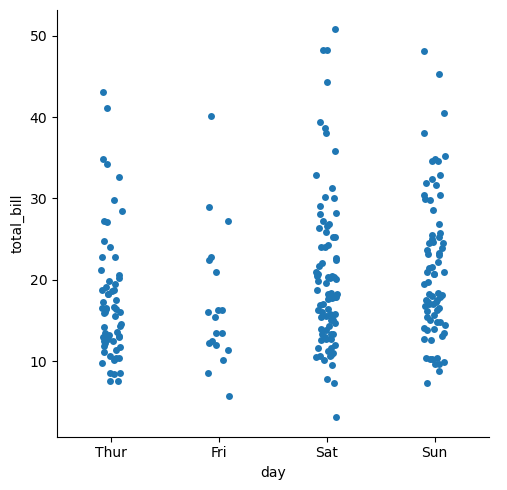

In [21]:
sns.catplot(x="day", y="total_bill", data=df, kind='strip');

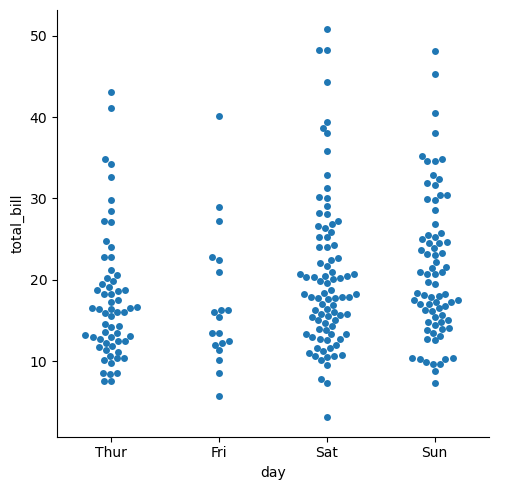

In [22]:
sns.catplot(x="day", y="total_bill", data=df, kind='swarm');

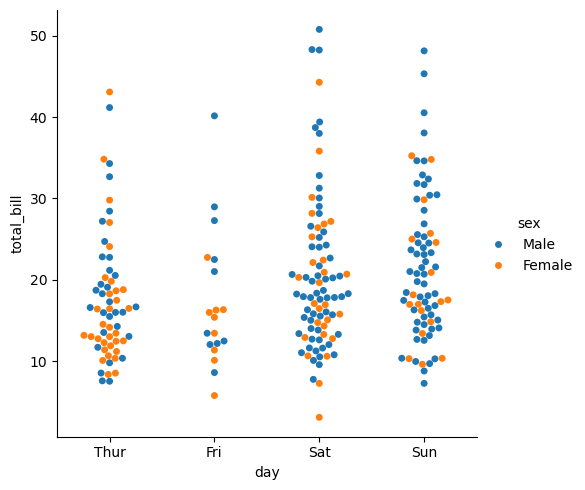

In [23]:
#Adding a a third variable
sns.catplot(x="day", y="total_bill", hue='sex', data=df, kind='swarm');

## Distribution of observations within categories
Boxplots and violin plots provide an excellent way to understand the distribution of categorical variables when we have a lot of data.

### Boxplot
Boxplot shows the three quartile values of the distribution along with extreme values.

A rectangle is drawn to represent the second and third quartiles, usually with a vertical line inside it, to indicate the median value. The lower and upper quartiles are shown as horizontal lines on either side of this rectangle.


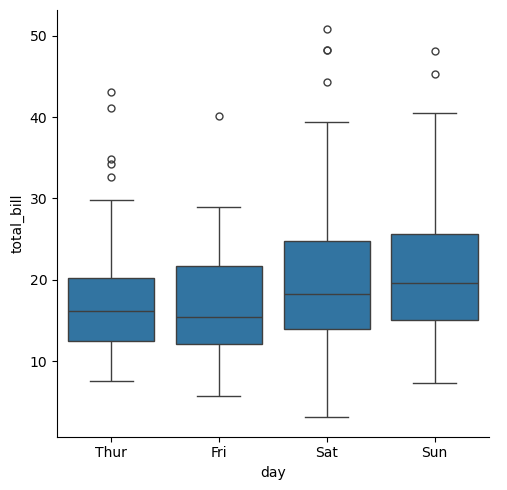

In [24]:
sns.catplot(x="day", y="total_bill", kind="box", data=df)

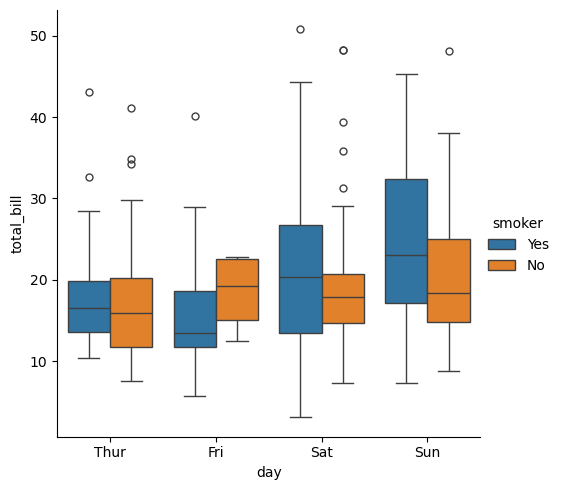

In [25]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=df)

### Violinplot
Violinplots  combine a boxplot with the kernel density estimation.

* the thin line  at the center is the interquartile range
* the thin line is the 95% confidence interval
* the white dot is the median
* the spread of the violin shape is a kernel density estimation


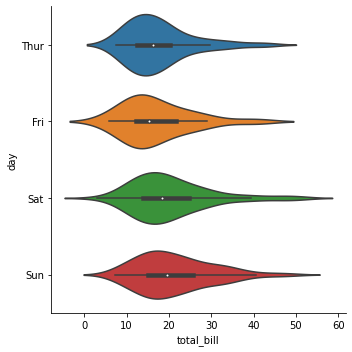

In [59]:
sns.catplot(x="total_bill", y="day", kind="violin", data=df)

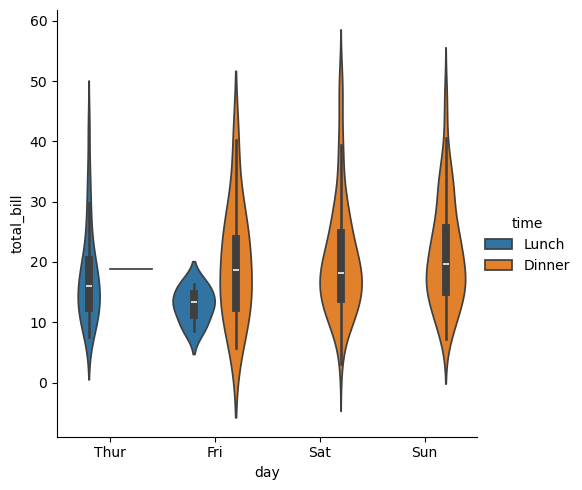

In [26]:
sns.catplot(y="total_bill", x="day", hue="time", kind="violin", data=df)

# References
* [Seaborn](http://seaborn.pydata.org) documentation

## Licence
The notebook is freely licensed under under the [Creative Commons Attribution Share-Alike license](https://creativecommons.org/licenses/by/2.0/).  

© Carlos A. Iglesias, Universidad Politécnica de Madrid.